# 501 多项式回归
通过原来的特征生成多次项的特征，将多项式回归变成线性回归。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
x = np.random.uniform(-3, 3, size=100)   #random.uniform(x, y) 方法将随机生成一个实数，它在 [x,y] 范围内。
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

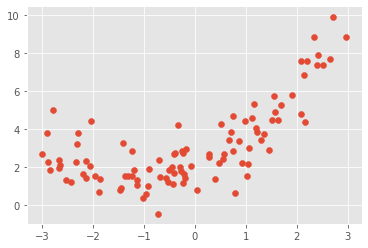

In [3]:
plt.scatter(x, y)

### 线性回归？

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

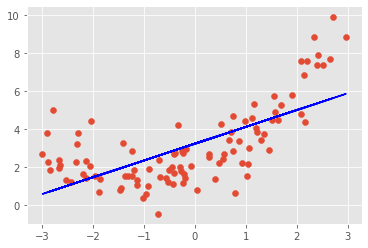

In [5]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='b')

### 解决方案， 添加一个特征

In [6]:
X2 = np.hstack([X, X**2])

In [7]:
X2.shape

(100, 2)

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

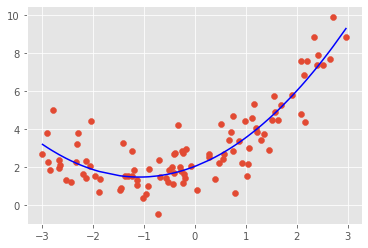

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='b')  # 原来数据集是乱序的，所以这里排序然后显示

In [10]:
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

[1.03618278 0.47405538]
2.0412583077890636


## scikit-learn中的多项式回归和Pipeline

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [12]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X3 = poly.transform(X)

In [14]:
X3.shape

(100, 3)

In [15]:
X3[:5,:]

array([[ 1.        , -2.28502149,  5.2213232 ],
       [ 1.        , -1.95058934,  3.80479879],
       [ 1.        ,  2.55287877,  6.51719   ],
       [ 1.        ,  0.51849598,  0.26883808],
       [ 1.        , -0.44412202,  0.19724437]])

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg3 = LinearRegression()
lin_reg3.fit(X3, y)
y_predict3 = lin_reg3.predict(X3)

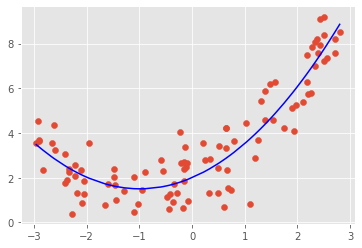

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict3[np.argsort(x)], color='b')

In [18]:
print(lin_reg3.coef_)
print(lin_reg3.intercept_)

[0.         1.01371344 0.51168059]
2.0073820141637313


### 关于PolynomialFeatures

In [19]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [20]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X4 = poly.transform(X)

In [21]:
print(X4.shape)
print(X4)             # 1, x1, x2, x1², x1*x2, x2²

(5, 6)
[[  1.   1.   2.   1.   2.   4.]
 [  1.   3.   4.   9.  12.  16.]
 [  1.   5.   6.  25.  30.  36.]
 [  1.   7.   8.  49.  56.  64.]
 [  1.   9.  10.  81.  90. 100.]]


### Pipeline方法封装

In [22]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [23]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

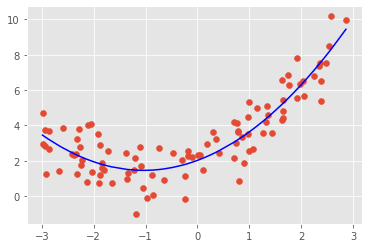

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='b')